### Looking for correlation between Aid and Infant Mortality Rates

by Julia Sweet

As one of the stated goals of USAID is to improve health outcomes across the world, we decided to look for correlations between aid and health outcomes. The World Bank has multiple indicators that relate to health; we chose infant mortality rates as the one to focus on. We searched for correlations between aid and infant mortality rates. We would expect improved infant mortality rates after reciept of aid, so we looked at 2, 4, and 6 year intervals, or for aid to increase in response to higher infant mortality rates. 

The World Bank data did show clear improvements in infant mortality in most (but not all) countries, so we should be able to see changes in funding that correlate to those improvements if USAID funding is responsible. 

In [149]:
import pandas as pd
import numpy as np
import plotly 
import wbpy
plotly.tools.set_credentials_file(username='richongo', api_key='knfESm6zSffWin5ujtln')
#My classmate graciously allowed me to use his information for plotly for this project.
import matplotlib.pyplot as plt
import scipy.stats as stats

In [150]:
#Import Aid data
file1 = "Economic_vs_Military.xlsx"
Aid_df = pd.read_excel(file1)
file2= "InfantMortality.csv"
Aid_df = Aid_df.rename(columns={"Row Labels": "Country"})
InfantMortality_df = pd.read_csv(file2)
Aid_df.head()


,Country,Year,Economic,Military,Grand Total
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07


In [151]:
Infant_Mortality = InfantMortality_df.drop(columns=["Unnamed: 0"])
Infant_Mortality.head()

,Year,Angola,Burundi,Benin,Ethiopia,Ghana,Kenya,Madagascar,Mali,Mozambique,Namibia,Nigeria,Rwanda,Senegal,Sierra Leone,Somalia,Uganda,South Africa,Zimbabwe
0,2002,95971.0,24984.0,25051.0,236821.0,41281.0,75705.0,40879.0,59444.0,85134.0,2804.0,568287.0,29228.0,25026.0,29723.0,46562.0,98596.0,59495.0,23990.0
1,2003,95253.0,24759.0,24920.0,227584.0,40940.0,73661.0,39524.0,58812.0,82977.0,2780.0,564928.0,27352.0,24344.0,29885.0,47551.0,96119.0,59666.0,24394.0
2,2004,93986.0,24537.0,24813.0,217766.0,40789.0,71278.0,38252.0,58033.0,80906.0,2724.0,560267.0,25200.0,23665.0,29984.0,48604.0,93242.0,59263.0,25221.0
3,2005,92430.0,24267.0,24755.0,207679.0,40758.0,68408.0,37048.0,57135.0,78926.0,2559.0,554716.0,23209.0,23032.0,29984.0,49701.0,90154.0,58548.0,26068.0
4,2006,90346.0,23937.0,24793.0,198004.0,40772.0,65861.0,35925.0,56376.0,76947.0,2461.0,548359.0,21394.0,22467.0,29798.0,50689.0,87169.0,57132.0,27209.0


In [152]:
#Unpack Infant_Mortality DataFrame from pivot form so that it can be merged with Aid_df

InfantMortality_melt=Infant_Mortality.melt(id_vars=["Year"],
                                              var_name="Country",
                                              value_name="Infant Mortality")
InfantMortality_melt.head(10)

,Year,Country,Infant Mortality
0,2002,Angola,95971.0
1,2003,Angola,95253.0
2,2004,Angola,93986.0
3,2005,Angola,92430.0
4,2006,Angola,90346.0
5,2007,Angola,87956.0
6,2008,Angola,85249.0
7,2009,Angola,82217.0
8,2010,Angola,79220.0
9,2011,Angola,76226.0


In [153]:
#Merge the DataFrames

combined_data=pd.merge(Aid_df, InfantMortality_melt, on=["Country", "Year"])
combined_data.head()

,Country,Year,Economic,Military,Grand Total,Infant Mortality
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08,95971.0
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08,95253.0
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08,93986.0
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07,92430.0
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07,90346.0


In [154]:
#Renaming column for clarity. 
CombinedAid_InfantMortality= combined_data.rename(index=str, columns={"Grand Total": "Total Aid"})


## Create new data frames to show changes in infant mortality after receipt of funding

Created three new DataFrames by using .shift function. The first will show what happens to the infant mortality rate two years after a country receives aid. The second will show what happens to the infant mortality rate four years after a country receives aid. The third will show what happens to the infant mortality rate six years after a country receives aid. We included several lags in order to account for delays in distribution of resources and application of new policies. 

In [155]:

# Group by country and shift Infant Mortality column two years ahead to see whether there is any impact. 
CombinedAid_InfantMortality_2=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_2['Infant Mortality_2'] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Infant Mortality'].shift(-2)
CombinedAid_InfantMortality_2= CombinedAid_InfantMortality_2.dropna()

# Group by country; shift Infant Mortality column four years ahead to see effect
CombinedAid_InfantMortality_4=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_4['Infant Mortality_4'] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Infant Mortality'].shift(-4)
CombinedAid_InfantMortality_4= CombinedAid_InfantMortality_4.dropna()

# Repeat for 6-year impact
CombinedAid_InfantMortality_6=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_6['Infant Mortality_6'] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Infant Mortality'].shift(-6)
CombinedAid_InfantMortality_6= CombinedAid_InfantMortality_6.dropna()

#This results in NaN values, as the multi-year impact goes beyond the range of our data. 
#Drop rows with NaN values. 

CombinedAid_InfantMortality_4.head(10)

# Check head to ensure that new column (Infant Mortality_#) shows the correct value. 
# (Rows in Infant Mortality_# should have the same value as the cell that is # rows below 
# the adjacent in Infant Mortality.)

,Country,Year,Economic,Military,Total Aid,Infant Mortality,Infant Mortality_4
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08,95971.0,90346.0
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08,95253.0,87956.0
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08,93986.0,85249.0
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07,92430.0,82217.0
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07,90346.0,79220.0
5,Angola,2007,6.191552e+07,512302.664188,6.242783e+07,87956.0,76226.0
6,Angola,2008,6.537215e+07,396706.828528,6.576886e+07,85249.0,73448.0
7,Angola,2009,6.095525e+07,535667.400000,6.149092e+07,82217.0,70939.0
8,Angola,2010,1.114652e+08,417850.218081,1.118831e+08,79220.0,68913.0
9,Angola,2011,8.945588e+07,458935.004372,8.991482e+07,76226.0,67337.0


## Create visualizations to show relationship between aid and infant mortality rates at year-on-year, 2-year, 4-year, and 6-year basis. Plots show impact of economic aid and military aid, respectively. 

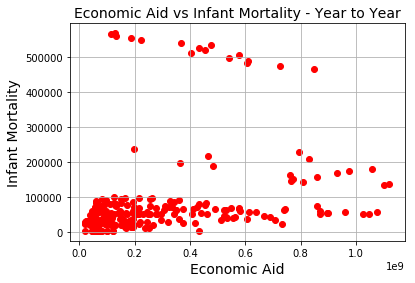

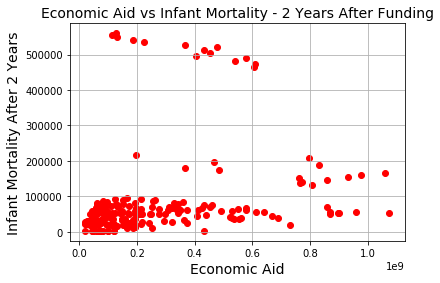

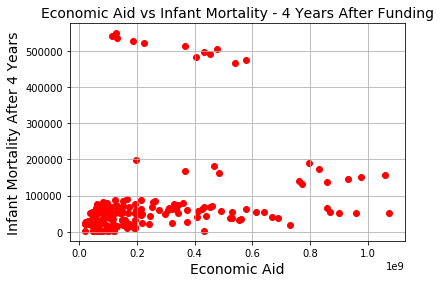

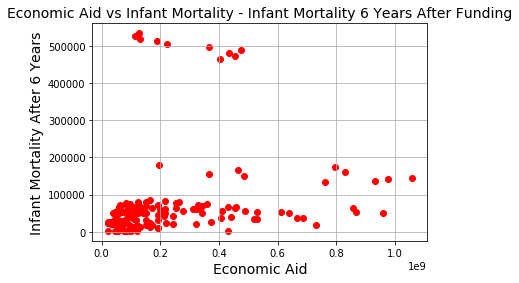

In [156]:
plt.scatter(CombinedAid_InfantMortality['Economic'], 
            CombinedAid_InfantMortality['Infant Mortality'], c='red')
plt.title('Economic Aid vs Infant Mortality - Year to Year', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter 
plt.scatter(CombinedAid_InfantMortality_2['Economic'], 
            CombinedAid_InfantMortality_2['Infant Mortality_2'], color='red')
plt.title('Economic Aid vs Infant Mortality - 2 Years After Funding', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality After 2 Years', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 4 years after 
plt.scatter(CombinedAid_InfantMortality_4['Economic'], 
            CombinedAid_InfantMortality_4['Infant Mortality_4'], color='red')
plt.title('Economic Aid vs Infant Mortality - 4 Years After Funding', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality After 4 Years', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 6 years after 
plt.scatter(CombinedAid_InfantMortality_6a['Economic'], 
            CombinedAid_InfantMortality_6a['Infant Mortality_6'], color='red')
plt.title('Economic Aid vs Infant Mortality - Infant Mortality 6 Years After Funding', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality After 6 Years', fontsize=14)
plt.grid(True)
plt.show()

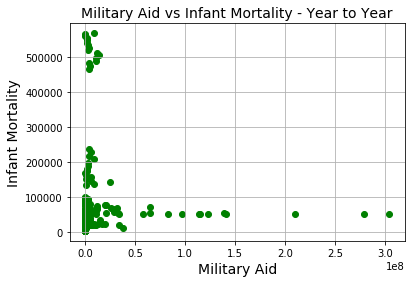

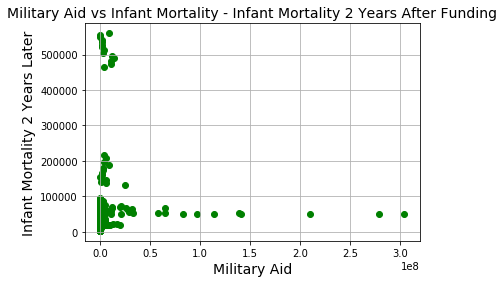

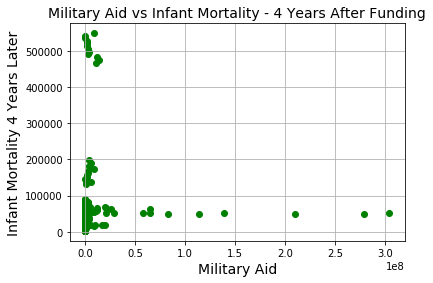

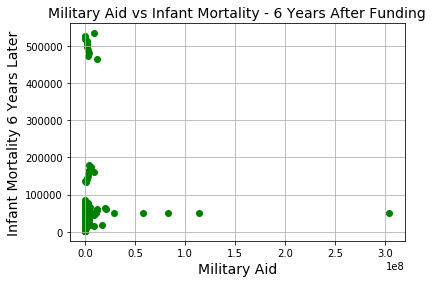

In [157]:
#Scatter Military vs Infant Mortality for funding on Year
plt.scatter(CombinedAid_InfantMortality['Military'], 
            CombinedAid_InfantMortality['Infant Mortality'], color='green')
plt.title('Military Aid vs Infant Mortality - Year to Year', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Military vs Infant Mortality for funding 2 years after
plt.scatter(CombinedAid_InfantMortality_2['Military'], 
            CombinedAid_InfantMortality_2['Infant Mortality_2'], color='green')
plt.title('Military Aid vs Infant Mortality - Infant Mortality 2 Years After Funding', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Infant Mortality 2 Years Later', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Military vs Infant Mortality for funding 4 years after
plt.scatter(CombinedAid_InfantMortality_4['Military'], 
            CombinedAid_InfantMortality_4['Infant Mortality_4'], color='green')
plt.title('Military Aid vs Infant Mortality - 4 Years After Funding', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Infant Mortality 4 Years Later', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Military vs Infant Mortality for funding 6 years after
plt.scatter(CombinedAid_InfantMortality_6['Military'], 
            CombinedAid_InfantMortality_6['Infant Mortality_6'], color='green')
plt.title('Military Aid vs Infant Mortality - 6 Years After Funding', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Infant Mortality 6 Years Later', fontsize=14)
plt.grid(True)
plt.show()





## Repeat the process, instead shifting Economic column, to determine whether Economic Aid changes in response to changes in infant mortality rates

Assuming that aid is allocated based on outcomes, improvements in infant mortality should result in a reduction in aid and vice versa. Here, we examine whether aid changes in response to improved infant mortality. 

In [158]:
# Group by country and shift two years ahead to see whether there is any impact. 

CombinedAid_InfantMortality_2e=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_2e['Economic_2'] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Economic'].shift(-2)
CombinedAid_InfantMortality_2e= CombinedAid_InfantMortality_2e.dropna()

# Group by country; shift four years ahead to see effect
CombinedAid_InfantMortality_4e=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_4e['Economic_4'] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Economic'].shift(-4)
CombinedAid_InfantMortality_4e= CombinedAid_InfantMortality_4e.dropna()

# Repeat for 6-year impact
CombinedAid_InfantMortality_6e=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_6e['Economic_6'] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Economic'].shift(-6)
CombinedAid_InfantMortality_6e= CombinedAid_InfantMortality_6e.dropna()

#Can confirm accuracy by looking at header
CombinedAid_InfantMortality_4e.head()


,Country,Year,Economic,Military,Total Aid,Infant Mortality,Economic_4
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08,95971.0,9.623060e+07
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08,95253.0,6.191552e+07
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08,93986.0,6.537215e+07
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07,92430.0,6.095525e+07
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07,90346.0,1.114652e+08


In [159]:
#Repeat for military aid.
# Group by country and shift two years ahead to see whether there is any impact. 
CombinedAid_InfantMortality_2m=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_2m['Military_2'] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Military'].shift(-2)
CombinedAid_InfantMortality_2m= CombinedAid_InfantMortality_2m.dropna()

# Group by country; shift four years ahead to see effect
CombinedAid_InfantMortality_4m=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_4m['Military_4'] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Military'].shift(-4)
CombinedAid_InfantMortality_4m= CombinedAid_InfantMortality_4m.dropna()

# Repeat for 6-year impact
CombinedAid_InfantMortality_6m=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_6m['Military_6'] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Military'].shift(-6)
CombinedAid_InfantMortality_6m= CombinedAid_InfantMortality_6m.dropna()
#Can confirm accuracy by looking at header
CombinedAid_InfantMortality_2m.head()

,Country,Year,Economic,Military,Total Aid,Infant Mortality,Military_2
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08,95971.0,638258.217553
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08,95253.0,387385.061877
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08,93986.0,768343.338990
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07,92430.0,512302.664188
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07,90346.0,396706.828528


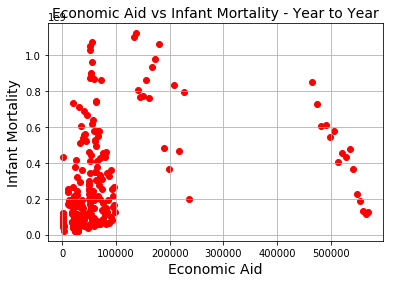

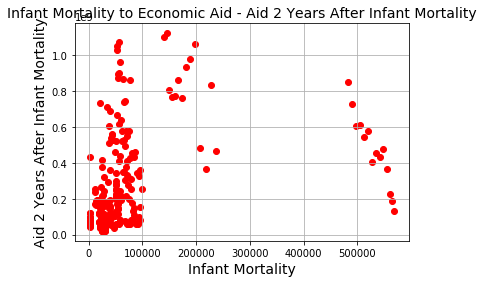

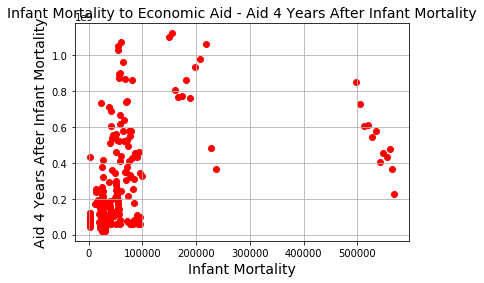

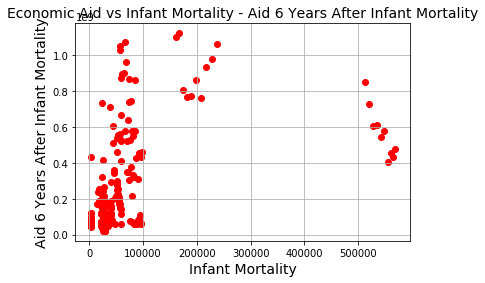

In [160]:
plt.scatter(CombinedAid_InfantMortality['Infant Mortality'], 
            CombinedAid_InfantMortality['Economic'], c='red')
plt.title('Economic Aid vs Infant Mortality - Year to Year', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter 
plt.scatter(CombinedAid_InfantMortality_2e['Infant Mortality'], 
            CombinedAid_InfantMortality_2e['Economic_2'], color='red')
plt.title('Infant Mortality to Economic Aid - Aid 2 Years After Infant Mortality', fontsize=14)
plt.xlabel('Infant Mortality', fontsize=14)
plt.ylabel('Aid 2 Years After Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 4 years after 
plt.scatter(CombinedAid_InfantMortality_4e['Infant Mortality'], 
            CombinedAid_InfantMortality_4e['Economic_4'], color='red')
plt.title('Infant Mortality to Economic Aid - Aid 4 Years After Infant Mortality', fontsize=14)
plt.xlabel('Infant Mortality', fontsize=14)
plt.ylabel('Aid 4 Years After Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 6 years after 
plt.scatter(CombinedAid_InfantMortality_6e['Infant Mortality'], 
            CombinedAid_InfantMortality_6e['Economic_6'], color='red')
plt.title('Economic Aid vs Infant Mortality - Aid 6 Years After Infant Mortality', fontsize=14)
plt.xlabel('Infant Mortality', fontsize=14)
plt.ylabel('Aid 6 Years After Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

## Analysis

Relatively little change in distribution between the graphs; economic aid does not seem to be influenced by infant mortality rates in Sub-Saharan Africa. 

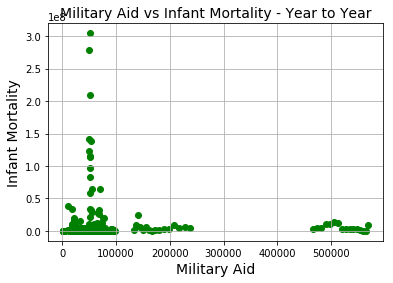

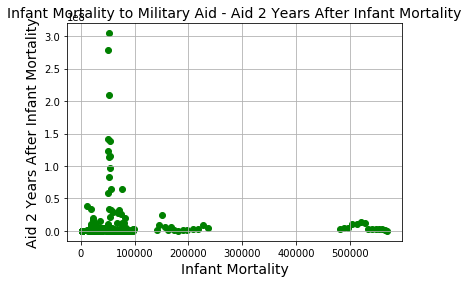

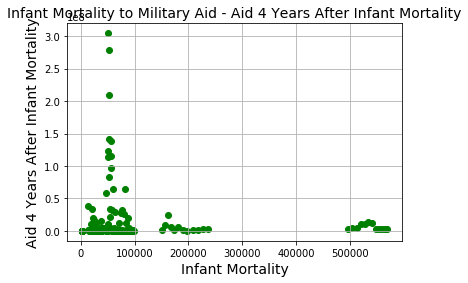

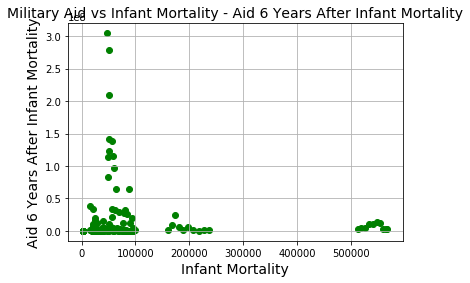

In [161]:
# Repeat for military aid

plt.scatter(CombinedAid_InfantMortality['Infant Mortality'], 
            CombinedAid_InfantMortality['Military'], c='green')
plt.title('Military Aid vs Infant Mortality - Year to Year', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter 
plt.scatter(CombinedAid_InfantMortality_2m['Infant Mortality'], 
            CombinedAid_InfantMortality_2m['Military_2'], color='green')
plt.title('Infant Mortality to Military Aid - Aid 2 Years After Infant Mortality', fontsize=14)
plt.xlabel('Infant Mortality', fontsize=14)
plt.ylabel('Aid 2 Years After Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 4 years after 
plt.scatter(CombinedAid_InfantMortality_4m['Infant Mortality'], 
            CombinedAid_InfantMortality_4m['Military_4'], color='green')
plt.title('Infant Mortality to Military Aid - Aid 4 Years After Infant Mortality', fontsize=14)
plt.xlabel('Infant Mortality', fontsize=14)
plt.ylabel('Aid 4 Years After Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 6 years after 
plt.scatter(CombinedAid_InfantMortality_6m['Infant Mortality'], 
            CombinedAid_InfantMortality_6m['Military_6'], color='green')
plt.title('Military Aid vs Infant Mortality - Aid 6 Years After Infant Mortality', fontsize=14)
plt.xlabel('Infant Mortality', fontsize=14)
plt.ylabel('Aid 6 Years After Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

## Analysis

Plots are relatively stable; this would imply that military aid is not particularly influenced by infant mortality rates. 

In [162]:
# Regression using Ricardo's starter code. 

from sklearn import linear_model
X0 = CombinedAid_InfantMortality[['Economic', 'Military']]
Y0 = CombinedAid_InfantMortality['Infant Mortality'] 

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X0, Y0)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 41056.45646967007
Coefficients: 
 [ 0.0001439 -0.0002036]


In [163]:
# Use stats models
import statsmodels.api as sm
#Need a constant
X = sm.add_constant(X0) 
model = sm.OLS(Y0, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Infant Mortality   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     16.30
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           1.99e-07
Time:                        16:32:00   Log-Likelihood:                -3749.7
No. Observations:                 288   AIC:                             7505.
Df Residuals:                     285   BIC:                             7516.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.106e+04   9054.968      4.534      0.0

C:\Users\julia\anaconda\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [164]:
#2 Year Regression for military aid

X2 = CombinedAid_InfantMortality_2m[["Military", "Economic"]]# here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Economiv'] for example. Alternatively, you may add additional variables within the brackets
Y2 = CombinedAid_InfantMortality_2m['Infant Mortality']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X2, Y2)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X2) # adding a constant 
model = sm.OLS(Y2, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 42405.513015959536
Coefficients: 
 [-0.0001499  0.0001549]
                            OLS Regression Results                            
Dep. Variable:       Infant Mortality   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     13.63
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           2.42e-06
Time:                        16:32:01   Log-Likelihood:                -3285.1
No. Observations:                 252   AIC:                             6576.
Df Residuals:                     249   BIC:                             6587.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

C:\Users\julia\anaconda\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [165]:
#4 Year Regression for economic aid

X4 = CombinedAid_InfantMortality_4e[["Military", "Economic"]]# here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Economiv'] for example. Alternatively, you may add additional variables within the brackets
Y4 = CombinedAid_InfantMortality_4e['Infant Mortality']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X2, Y2)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X2) # adding a constant 
model = sm.OLS(Y2, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 42405.513015959536
Coefficients: 
 [-0.0001499  0.0001549]
                            OLS Regression Results                            
Dep. Variable:       Infant Mortality   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     13.63
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           2.42e-06
Time:                        16:32:03   Log-Likelihood:                -3285.1
No. Observations:                 252   AIC:                             6576.
Df Residuals:                     249   BIC:                             6587.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

C:\Users\julia\anaconda\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



## Analysis

Regression confirms that the relationship between aid (both military and economic) and infant mortality is relatively low. No more than 10% of the variability around the mean can be explained. Our f-statistic, which helps determine the likelihood that our variables (military and economic aid) together are statistically significant. Given the extremely low number, we can conclude that it is very unlikely. 

In [166]:
#Make a bubble plot showing the relationship between total aid and infant mortality. 
#Larger bubbles indicate greater amounts of aid. 

CombinedAid_InfantMortality.iplot(kind='bubble', x='Year', y='Infant Mortality', 
                                  size='Total Aid', text='Country',
                           title='Aid to Infant Mortality', xTitle='Year', yTitle='Infant Mortality',
                           mode='markers', filename='Aid_vs_InfantMortality_bubbleplot')

# To see this plot in full color, go here: https://plot.ly/create/?fid=juliasweet:3&fid=juliasweet:2

## Final analysis of the relationship between aid and infant mortality on a regional level: 

Aid does not strongly correlate with infant mortality. Higher rates of infant mortality do not correlate with greater amounts of aid in future years. Low rates of infant mortality do not correlate with reduced aid in future years. Higher amounts of aid do not correlate with reduced infant mortality in later years, and lower amounts of aid do not predict worse rates of infant mortality in future years. 

Our analysis shows that USAID funding seems to have little to no influence on infant mortality rates (and vice versa) in sub-Saharan Africa as a whole in the years 2002-2017.

## A closer look

In my exploration of the data, I noticed that four countries, Benin, Namibia, Somalia, and Zimbabwe, diverged somewhat from other countries in their progress on infant mortality rates. I wanted to look at whether changes in aid could explain (or be explained by) these fluctuations. 

In [167]:
var_AIM= CombinedAid_InfantMortality.loc[(CombinedAid_InfantMortality['Country']=="Benin")|
(CombinedAid_InfantMortality['Country']=="Namibia")|
(CombinedAid_InfantMortality['Country']=="Somalia")|
(CombinedAid_InfantMortality['Country']=="Zimbabwe"),:]
var_AIM.head(10)

,Country,Year,Economic,Military,Total Aid,Infant Mortality
16,Benin,2002,3.878304e+07,669234.634894,3.945227e+07,25051.0
17,Benin,2003,4.141855e+07,499708.531080,4.191826e+07,24920.0
18,Benin,2004,4.025426e+07,0.000000,4.025426e+07,24813.0
19,Benin,2005,3.020562e+07,0.000000,3.020562e+07,24755.0
20,Benin,2006,2.284744e+07,413538.926602,2.326098e+07,24793.0
21,Benin,2007,3.744548e+08,445785.006196,3.749006e+08,24901.0
22,Benin,2008,3.501206e+07,166914.112291,3.517898e+07,25086.0
23,Benin,2009,4.779450e+07,481422.600000,4.827592e+07,25313.0
24,Benin,2010,5.123644e+07,353996.431404,5.159044e+07,25560.0
25,Benin,2011,4.924125e+07,698842.728942,4.994010e+07,25785.0


In [168]:
# Group by country and shift two years ahead to see whether there is any impact. 

var_AIM_2=var_AIM.copy()
var_AIM_2['Economic_2'] = var_AIM.groupby(
    ['Country'])['Economic'].shift(-2)
var_AIM_2['Military_2'] = var_AIM.groupby(
    ['Country'])['Military'].shift(-2)
var_AIM_2= var_AIM_2.dropna()

# Group by country; shift four years ahead to see effect
var_AIM_4=var_AIM.copy()
var_AIM_4['Economic_4'] = var_AIM.groupby(
    ['Country'])['Economic'].shift(-4)
var_AIM_4['Military_4'] = var_AIM.groupby(
    ['Country'])['Military'].shift(-4)
var_AIM_4= var_AIM_4.dropna()

# Repeat for 6-year impact
var_AIM_6=var_AIM.copy()
var_AIM_6['Economic_6'] = var_AIM.groupby(
    ['Country'])['Economic'].shift(-6)
var_AIM_6['Military_6'] = var_AIM.groupby(
    ['Country'])['Military'].shift(-6)
var_AIM_2= var_AIM_6.dropna()

#Can confirm accuracy by looking at header
var_AIM_6.head()

,Country,Year,Economic,Military,Total Aid,Infant Mortality,Economic_6,Military_6
16,Benin,2002,3.878304e+07,669234.634894,3.945227e+07,25051.0,3.501206e+07,1.669141e+05
17,Benin,2003,4.141855e+07,499708.531080,4.191826e+07,24920.0,4.779450e+07,4.814226e+05
18,Benin,2004,4.025426e+07,0.000000,4.025426e+07,24813.0,5.123644e+07,3.539964e+05
19,Benin,2005,3.020562e+07,0.000000,3.020562e+07,24755.0,4.924125e+07,6.988427e+05
20,Benin,2006,2.284744e+07,413538.926602,2.326098e+07,24793.0,4.577254e+07,1.149541e+06


In [169]:
import statsmodels.api as sm
# with statsmodels
X = sm.add_constant(X0) # adding a constant 
model = sm.OLS(Y0, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Infant Mortality   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     16.30
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           1.99e-07
Time:                        16:32:16   Log-Likelihood:                -3749.7
No. Observations:                 288   AIC:                             7505.
Df Residuals:                     285   BIC:                             7516.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.106e+04   9054.968      4.534      0.0

In [170]:
#2 Year Regression

X2 = var_AIM_2[["Military", "Economic"]] 
Y2 = var_AIM_2['Infant Mortality']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X2, Y2)

# with statsmodels
X = sm.add_constant(X2) # adding a constant 
model = sm.OLS(Y2, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Infant Mortality   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     3.751
Date:                Sat, 20 Jul 2019   Prob (F-statistic):             0.0329
Time:                        16:32:18   Log-Likelihood:                -442.31
No. Observations:                  40   AIC:                             890.6
Df Residuals:                      37   BIC:                             895.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.37e+04   3700.248      6.406      0.0

C:\Users\julia\anaconda\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [171]:
#4 Year Regression

X4 = var_AIM_4[["Military", "Economic"]] 
Y4 = var_AIM_4['Infant Mortality']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X4, Y4)

# with statsmodels
X = sm.add_constant(X4) # adding a constant 
model = sm.OLS(Y4, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Infant Mortality   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     7.050
Date:                Sat, 20 Jul 2019   Prob (F-statistic):            0.00217
Time:                        16:32:18   Log-Likelihood:                -528.77
No. Observations:                  48   AIC:                             1064.
Df Residuals:                      45   BIC:                             1069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.279e+04   3319.178      6.867      0.0

C:\Users\julia\anaconda\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [172]:
#6 Year Regression

X6 = var_AIM_6[["Military", "Economic"]]# here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Economiv'] for example. Alternatively, you may add additional variables within the brackets
Y6 = var_AIM_6['Infant Mortality']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X6, Y6)

# with statsmodels
X = sm.add_constant(X6) # adding a constant 
model = sm.OLS(Y6, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Infant Mortality   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     11.48
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           5.89e-05
Time:                        16:32:19   Log-Likelihood:                -703.66
No. Observations:                  64   AIC:                             1413.
Df Residuals:                      61   BIC:                             1420.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.991e+04   2834.601      7.025      0.0

C:\Users\julia\anaconda\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



## Analysis

Although more variation from the mean could be explained in later years, it appears that it is still in the minority. Further information would be needed to explain the variations in infant mortality.

## Limitations

There were numerous limitations to our study, but the most significant were the data that we had available. 

We did not, for instance, take into account funding from sources other than USAID. It is possible that USAID, combined with funding from other sources, would have shown a greater impact. 

We also did not take into account the specific agencies or sub-agencies responsible for funding, nor did we take into account specific projects. The complete data set did include this information. It's possible that had we taken into account funding from specific agencies or projects, we would have seen a difference. However, given the time constraints and the number of factors that contribute to infant mortality, it was not possible. 